### 4-1．고객의 특성을 알자
#### 데이터의 리드와 확인

In [1]:
# Pandas의 로드
import pandas as pd

# 파일 리드
bank_df = pd.read_csv('b-prep.csv', sep=',')

# 선두에서 5행까지 표시
bank_df.head()

,age,job2,number_yoy2,member2,period2,budget,pre_d,Hawaii,Ho Chi Minh,Hong Kong,...,Oceania,South America,fall,spring,summer,winter,bicycle,plane,ship,walking
0,20,0,0,0,0,350000,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,20,0,0,0,0,350000,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,20,0,0,0,0,350000,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,20,0,0,0,0,300000,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,20,0,0,0,0,310000,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [2]:
# 데이터의 건수, 항목수를 확인
print(bank_df.shape)

# 데이터 형을 확인
print(bank_df.dtypes)

(2736, 70)
age            int64
job2           int64
number_yoy2    int64
member2        int64
period2        int64
               ...  
winter         int64
bicycle        int64
plane          int64
ship           int64
walking        int64
Length: 70, dtype: object


#### 데이터의 정규화

In [3]:
# MinMaxScaler의 로드
from sklearn.preprocessing import MinMaxScaler

# 데이터 세트에서 목적변수를 제외
bank_df = bank_df.drop('pre_d', axis=1)

# 범위변환의 인스턴스를 생성
mc = MinMaxScaler()
mc.fit(bank_df)

# bank_df의 각항목을 정규화
bank_df_mc = pd.DataFrame(mc.transform(bank_df), columns=bank_df.columns)
bank_df_mc.head()

,age,job2,number_yoy2,member2,period2,budget,Hawaii,Ho Chi Minh,Hong Kong,Jeju,...,Oceania,South America,fall,spring,summer,winter,bicycle,plane,ship,walking
0,0.024691,0.0,0.0,0.0,0.0,0.014831,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.024691,0.0,0.0,0.0,0.0,0.014831,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.024691,0.0,0.0,0.0,0.0,0.014831,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.024691,0.0,0.0,0.0,0.0,0.004237,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.024691,0.0,0.0,0.0,0.0,0.006356,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [4]:
# StandardScaler의 로드
from sklearn.preprocessing import StandardScaler

# Z변환 인스턴스 생성
sc = StandardScaler()
sc.fit(bank_df)

# bank_df의 각항목을 정규화
bank_df_sc = pd.DataFrame(sc.transform(bank_df), columns=bank_df.columns)
bank_df_sc.head()

,age,job2,number_yoy2,member2,period2,budget,Hawaii,Ho Chi Minh,Hong Kong,Jeju,...,Oceania,South America,fall,spring,summer,winter,bicycle,plane,ship,walking
0,-0.969151,-1.898963,-0.514126,-0.674773,-0.894427,-0.953220,-0.272406,-0.267732,-0.284597,-0.270854,...,-0.297162,-0.310794,-0.7429,-0.495313,1.495951,-0.400996,-0.642257,-0.894427,3.300856,-0.467663
1,-0.969151,-1.898963,-0.514126,-0.674773,-0.894427,-0.953220,-0.272406,-0.267732,-0.284597,-0.270854,...,-0.297162,-0.310794,-0.7429,-0.495313,1.495951,-0.400996,-0.642257,-0.894427,-0.302952,2.138294
2,-0.969151,-1.898963,-0.514126,-0.674773,-0.894427,-0.953220,-0.272406,-0.267732,-0.284597,-0.270854,...,-0.297162,-0.310794,-0.7429,-0.495313,1.495951,-0.400996,-0.642257,1.118034,-0.302952,-0.467663
3,-0.969151,-1.898963,-0.514126,-0.674773,-0.894427,-0.988214,-0.272406,-0.267732,-0.284597,-0.270854,...,-0.297162,3.217561,-0.7429,-0.495313,1.495951,-0.400996,1.557010,-0.894427,-0.302952,-0.467663
4,-0.969151,-1.898963,-0.514126,-0.674773,-0.894427,-0.981215,-0.272406,-0.267732,-0.284597,-0.270854,...,-0.297162,3.217561,-0.7429,-0.495313,1.495951,-0.400996,-0.642257,-0.894427,3.300856,-0.467663


In [5]:
# 각 항목의 평균과 표준편차를 확인
print(bank_df_sc.mean())
print(bank_df_sc.std())

age           -1.808170e-16
job2          -2.136368e-15
number_yoy2   -8.122969e-16
member2       -6.006242e-15
period2        2.859636e-15
                   ...     
winter         1.571193e-15
bicycle       -4.988700e-16
plane          1.752984e-17
ship           1.057147e-15
walking       -7.938541e-16
Length: 69, dtype: float64
age            1.000183
job2           1.000183
number_yoy2    1.000183
member2        1.000183
period2        1.000183
                 ...   
winter         1.000183
bicycle        1.000183
plane          1.000183
ship           1.000183
walking        1.000183
Length: 69, dtype: float64


### 4-3．잠재적인 니즈의 추출
#### 주성분 분석

In [6]:
# PCA의 로드
from sklearn.decomposition import PCA

# 주성분을 누적기여율 80% 까지 추출
pca = PCA(0.80)
bank_df_pca = pca.fit_transform(bank_df_sc)

# 주성분을 확인
print(pca.n_components_)

# 차원압축한 데이터 세트의 사이즈 확인
print(bank_df_pca.shape)

43
(2736, 43)


In [7]:
# 파일에서 목적변수만 리드
y = pd.read_csv('b-prep.csv', sep=',')['pre_d']

# 데이터 세트에 y를 추가
bank_df_pca = pd.DataFrame(bank_df_pca)
bank_df_pca['pre_d'] = y

# 데이터 세트의 사이즈를 확인
print(bank_df_pca.shape)

(2736, 44)


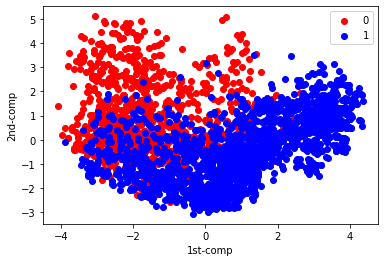

In [8]:
# Matplotlib의 로드
import matplotlib.pyplot as plt
%matplotlib inline

# y=0의 제1주성분과 제2주성분을 작성
bank_df_pca_0 = bank_df_pca[bank_df_pca['pre_d'] == 0]
bank_df_pca_0 = bank_df_pca_0.drop('pre_d', axis=1)
plt.scatter(bank_df_pca_0[0], bank_df_pca_0[1], c='red', label=0)

# y=1의 제1주성분과 제2성분을 작성
bank_df_pca_1 = bank_df_pca[bank_df_pca['pre_d'] == 1]
bank_df_pca_1 = bank_df_pca_1.drop('pre_d', axis=1)
plt.scatter(bank_df_pca_1[0], bank_df_pca_1[1], c='blue', label=1)

plt.legend()
plt.xlabel('1st-comp')
plt.ylabel('2nd-comp')
plt.show()